In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cluster import KMeans

data = pd.read_csv("happiness.csv")

main_data = data.drop('Ladder score in Dystopia',
               axis = 1) #after seeing distribution, decided to remove variable as it has one value for all objects

In [ ]:
main_data.head()

In [ ]:
subdata=main_data[["Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
subdata=(subdata-np.mean(subdata))/(np.max(subdata)-np.min(subdata))
subdata 

In [ ]:
best = KMeans(n_clusters=5, n_init=1)
best.fit(subdata)
for i in range(1000):
  model = KMeans(n_clusters=5, n_init=1)
  model.fit(subdata)
  if model.inertia_<best.inertia_:
    best=model
best.inertia_

11.945947024624356

In [ ]:
best9 = KMeans(n_clusters=9, n_init=1)
best9.fit(subdata)
for i in range(1000):
  model = KMeans(n_clusters=9, n_init=1)
  model.fit(subdata)
  if model.inertia_<best9.inertia_:
    best9=model
best9.inertia_

8.715080612921717

In [ ]:
b5=pd.DataFrame(best.cluster_centers_, columns=subdata.columns)*100
#b5.to_excel("b5.xlsx")
b5

In [ ]:
b9=pd.DataFrame(best9.cluster_centers_, columns=subdata.columns)*100
#b9.to_excel("b9.xlsx")
b9

In [ ]:
d1=main_data.copy()
d1["c5"]=best.predict(subdata)
d1["c9"]=best9.predict(subdata)
main_data["part"] = d1["c9"]

In [ ]:
d1.corr()

In [ ]:

mnd=list()
for i in range(500):
  samples=main_data[["Ladder score", "part"]].loc[np.random.randint(0, 149, size=149)]
  mnd.append(samples.loc[samples["part"]==2, ["Ladder score"]].mean()[0]-samples.loc[samples["part"]==3, ["Ladder score"]].mean()[0])

In [ ]:
plt.figure(figsize = (10, 10), dpi = 200)
plt.title("Distribution of difference between \nmeans of Ladder score in 2nd and 3rd clusters")
sns.distplot(mnd)
plt.savefig("diff.png");

In [ ]:
 np.mean(mnd)-np.std(mnd)*1.96, np.mean(mnd)+np.std(mnd)*1.96 #pivotal

(2.2580899193619515, 3.0511704687129444)

In [ ]:
np.sort(mnd)[int(500*(1-0.95)/2)],np.sort(mnd)[int(500*(1+0.95)/2)] #non-pivotal

(2.2597853260869574, 3.0685955882352944)

In [ ]:
data.loc[data["part"]==2,["Ladder score"]].mean()-data.loc[data["part"]==3,["Ladder score"]].mean()

Ladder score    1.128411
dtype: float64

In [ ]:
mnh=list()
for i in range(500):
  samples=data["Explained by: Healthy life expectancy"].loc[np.random.randint(0, 149, size=149)]
  mnh.append(samples.mean())

In [ ]:
plt.figure(figsize = (10, 10), dpi = 200)
plt.title("Distribution of grand mean of Explained by: Healthy life expectancy")
sns.distplot(mnh)
plt.savefig("grandm.png");

In [ ]:
main_data["Explained by: Healthy life expectancy"].mean()

0.5201610738255034

In [ ]:
np.mean(mnh)-np.std(mnh)*1.96, np.mean(mnh)+np.std(mnh)*1.96

(0.4859395362085973, 0.5579654302343559)

In [ ]:
np.sort(mnh)[int(500*(1-0.95)/2)],np.sort(mnh)[int(500*(1+0.95)/2)]

(0.4866979865771812, 0.5601208053691276)

In [ ]:
mng=list()
for i in range(500):
  samples=main_data[["Dystopia + residual", "part"]].loc[np.random.randint(0, 149,size=149)]
  mng.append(samples.loc[samples["part"]==0, ["Dystopia + residual"]].mean()[0]-samples["Dystopia + residual"].mean())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


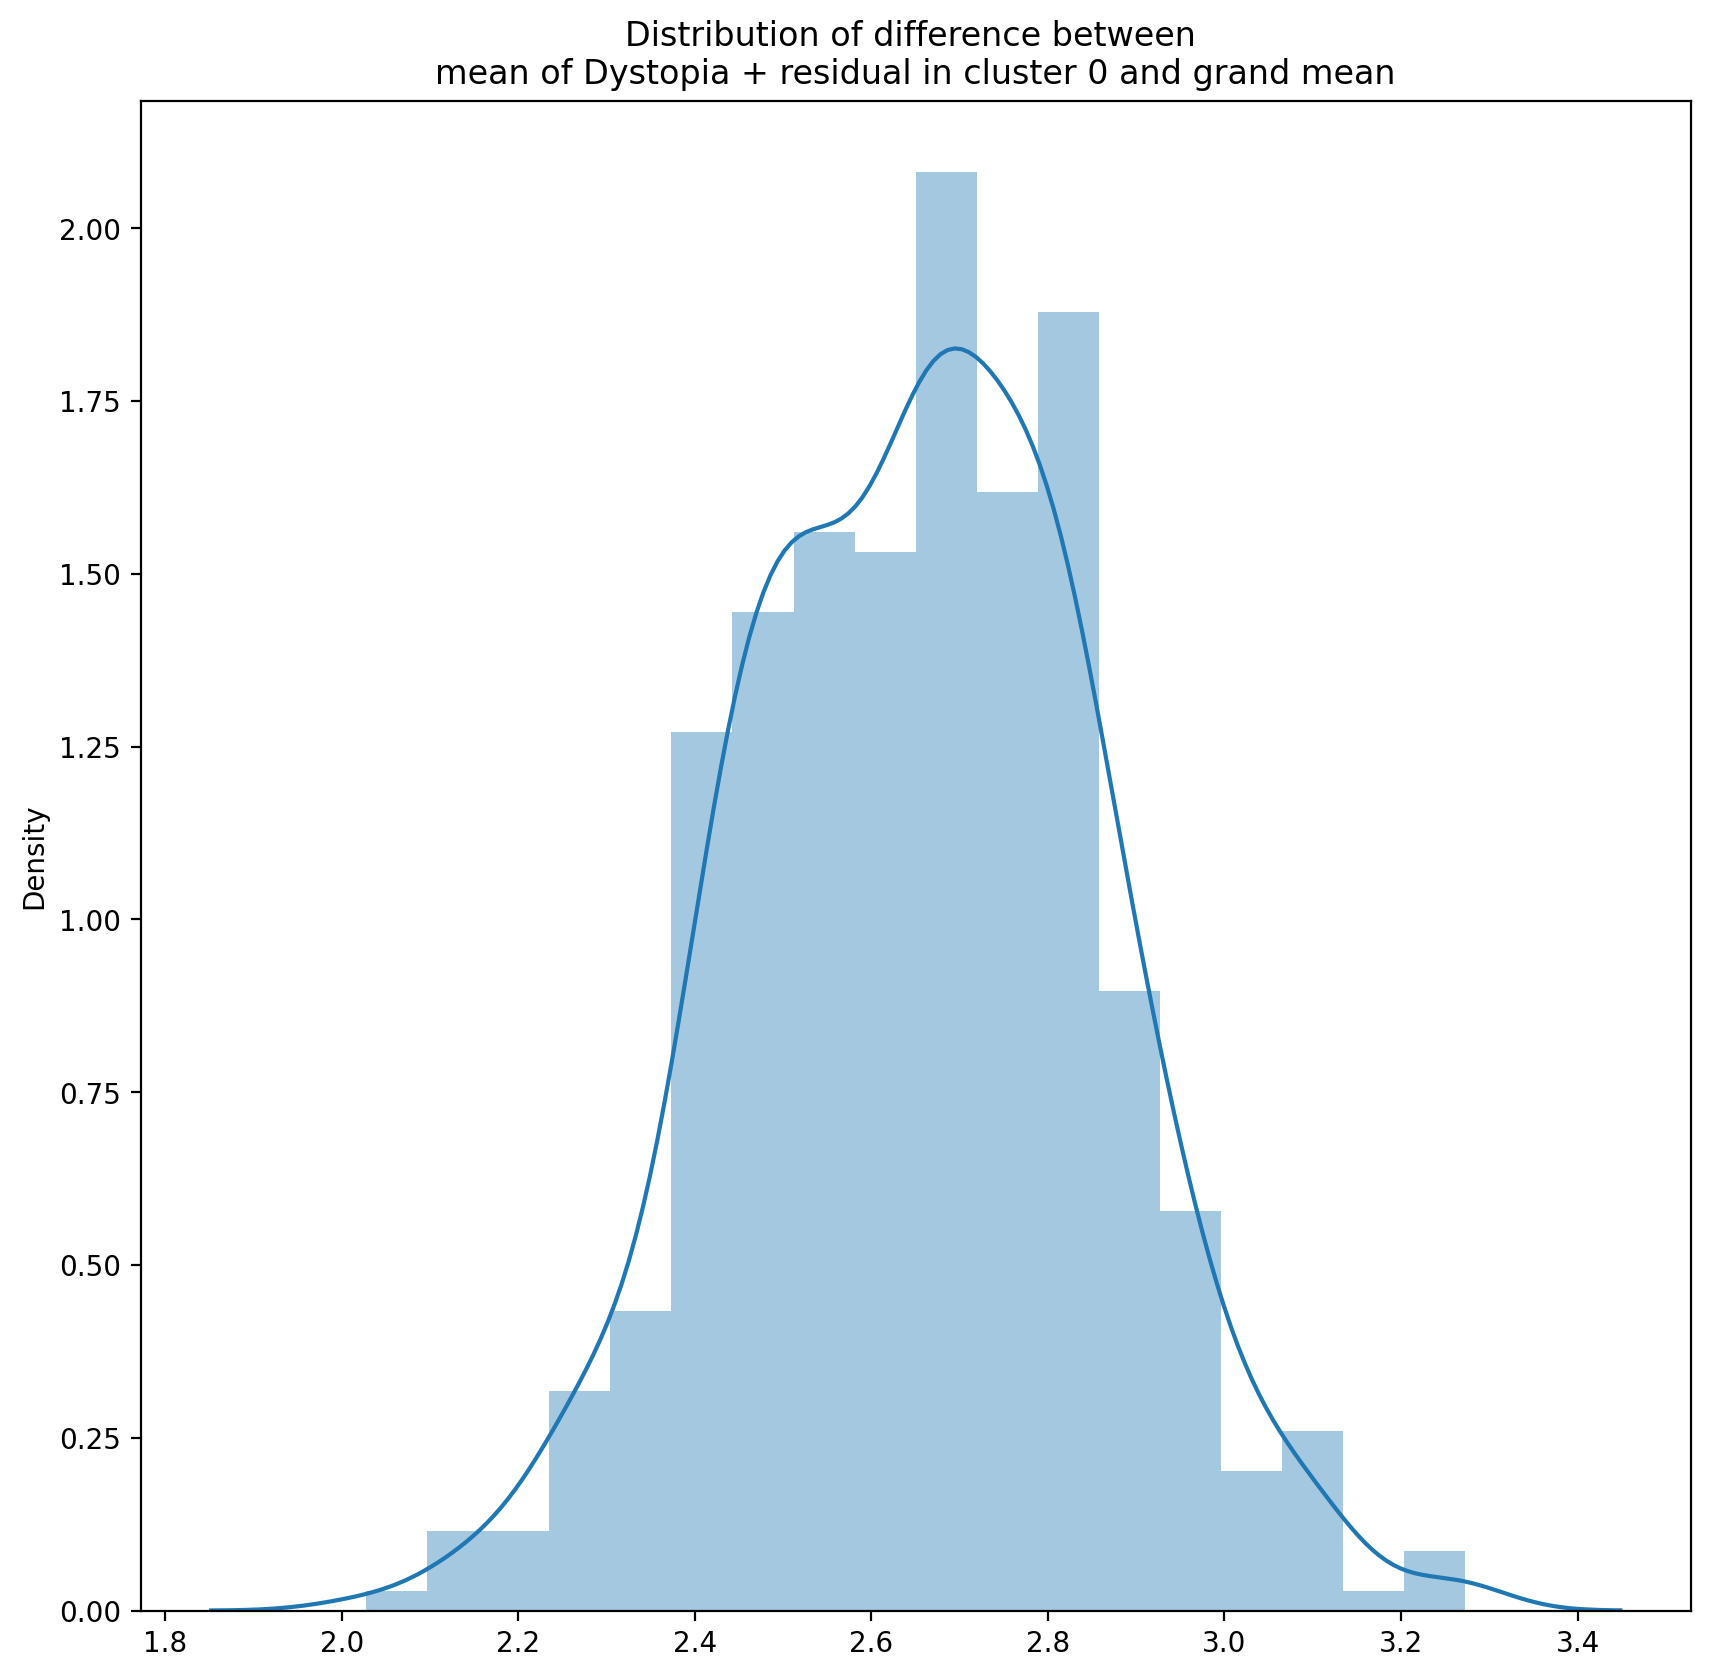

In [ ]:
plt.figure(figsize = (10, 10), dpi = 200)
plt.title("Distribution of difference between \nmean of Dystopia + residual in cluster 0 and grand mean")
sns.distplot(mnd)
plt.savefig("diffg.png");

In [ ]:
main_data.loc[data["part"]==0,["Dystopia + residual"]].mean()-main_data["Dystopia + residual"].mean()

Dystopia + residual    0.089147
dtype: float64

In [ ]:
np.mean(mng)-np.std(mng)*1.96, np.mean(mng)+np.std(mng)*1.96

(nan, nan)

In [ ]:
np.sort(mng)[int(500*(1-0.95)/2)],np.sort(mng)[int(500*(1+0.95)/2)]

(-1.258069351230425, 0.050063087248322535)